In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

In [45]:
#1
data=pd.read_csv('./Euro2012_stats.csv')
data

Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12               42                33   
14               Sweden      5               17                19   
15              Ukraine      2                7                26   

   Shooting Accuracy % Goals-to-shots  Total shots (inc. Blocked)  \
0              51.9%            16.0%                          32   
1              41.9%            12.9%                          39   
2              50.0%            20.0%                          27   
3              50.0%            17.2%                          40   
4              37.9%             6.5%                          65   
5              47.8%            15.6%                          80   
6              30.7%            19.2%                          32   
7              43.0%             7.5%                         110   
8              25.0%             4.1%                          60   
9              39.4%             5.2%                          48   
10             34.3%             9.3%                          82   
11             36.8%             5.2%                          28   
12             22.5%            12.5%                          59   
13             55.9%            16.0%                         100   
14             47.2%            13.8%                          39   
15             21.2%             6.0%                          38   

    Hit Woodwork  Penalty goals  Penalties not scored  ...  Saves made  \
0              0              0                     0  ...          13   
1              0              0                     0  ...           9   
2              1              0                     0  ...          10   
3              0              0                     0  ...          22   
4              1              0                     0  ...           6   
5              2              1                     0  ...          10   
6              1              1                     1  ...          13   
7              2              0                     0  ...          20   
8              2              0                     0  ...          12   
9              0              0                     0  ...           6   
10             6              0                     0  ...          10   
11             0              0                     0  ...          17   
12             2              0                     0  ...          10   
13             0              1                     0  ...          15   
14             3              0                     0  ...           8   
15             0              0                     0  ...          13   

    Saves-to-shots ratio  Fouls Won Fouls Conceded  Offsides  Yellow Cards  \
0                  81.3%         41             62         2             9   
1                  60.1%         53             73         8             7   
2                  66.7%         25             38         8             4   
3                  88.1%         43             45         6             5   
4                  54.

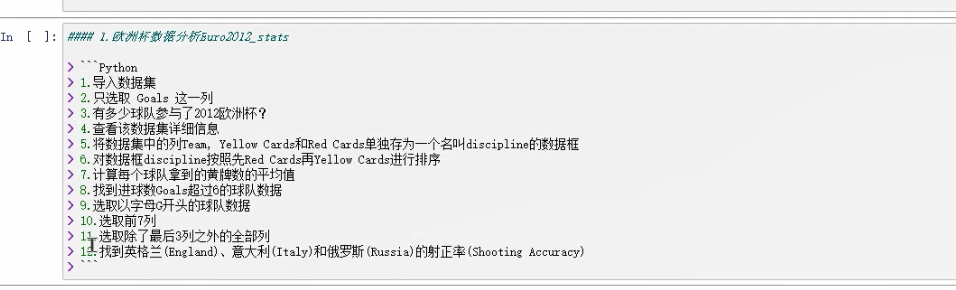

In [3]:
#2
data.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [12]:
#3
data.shape[0]
#担心有重复 先去重在计算长度
len(data.Team.unique())

16

In [22]:
#4
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Team                        16 non-null     object 
 1   Goals                       16 non-null     int64  
 2   Shots on target             16 non-null     int64  
 3   Shots off target            16 non-null     int64  
 4   Shooting Accuracy           16 non-null     object 
 5   % Goals-to-shots            16 non-null     object 
 6   Total shots (inc. Blocked)  16 non-null     int64  
 7   Hit Woodwork                16 non-null     int64  
 8   Penalty goals               16 non-null     int64  
 9   Penalties not scored        16 non-null     int64  
 10  Headed goals                16 non-null     int64  
 11  Passes                      16 non-null     int64  
 12  Passes completed            16 non-null     int64  
 13  Passing Accuracy            16 non-nu

In [16]:
#5
discipline=data[['Team','Yellow Cards','Red Cards']]
discipline

Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0

In [26]:
#6
discipline.sort_values('Red Cards',ascending=False).sort_values('Yellow Cards',ascending=False)
discipline.sort_values(['Red Cards','Yellow Cards'],ascending=False)

Team  Yellow Cards  Red Cards
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
7                 Italy            16          0
10             Portugal            12          0
13                Spain            11          0
0               Croatia             9          0
1        Czech Republic             7          0
14               Sweden             7          0
4                France             6          0
12               Russia             6          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
2               Denmark             4          0
5               Germany             4          0

In [27]:
#7计算球队拿到黄牌数的平均值
data['Yellow Cards'].mean()

7.4375

In [28]:
#8
f=data['Goals']>6
data[f]

Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5   Germany     10               32                32             47.8%   
13    Spain     12               42                33             55.9%   

   % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5             15.6%                          80             2              1   
13            16.0%                         100             0              1   

    Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                      0  ...          10                 62.6%         63   
13                     0  ...          15                 93.8%        102   

   Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5              49        12             4          0       15        15   
13             83        19            11          0       17        17   

    Players Used  
5             17  
13            18  

[2 rows x 35 columns]

In [35]:
#9 Team.str获取这个字段中的字符串数据
data.loc[data.Team.str.startswith("G")]

Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5  Germany     10               32                32             47.8%   
6   Greece      5                8                18             30.7%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5            15.6%                          80             2              1   
6            19.2%                          32             1              1   

   Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                     0  ...          10                 62.6%         63   
6                     1  ...          13                 65.1%         67   

  Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5             49        12             4          0       15        15   
6             48        12             9          1       12        12   

   Players Used  
5            17  
6            20  

[2 rows x 35 columns]

In [38]:
#10
data.iloc[:,:7]

Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12               42                33   
14               Sweden      5               17                19   
15              Ukraine      2                7                26   

   Shooting Accuracy % Goals-to-shots  Total shots (inc. Blocked)  
0              51.9%            16.0%                          32  
1              41.9%            12.9%                          39  
2              50.0%            20.0%                          27  
3              50.0%            17.2%                          40  
4              37.9%             6.5%                          65  
5              47.8%            15.6%                          80  
6              30.7%            19.2%                          32  
7              43.0%             7.5%                         110  
8              25.0%             4.1%                          60  
9              39.4%             5.2%                          48  
10             34.3%             9.3%                          82  
11             36.8%             5.2%                          28  
12             22.5%            12.5%                          59  
13             55.9%            16.0%                         100  
14             47.2%            13.8%                          39  
15             21.2%             6.0%                          38

In [37]:
#11
data.iloc[:,:-3]

Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12               42                33   
14               Sweden      5               17                19   
15              Ukraine      2                7                26   

   Shooting Accuracy % Goals-to-shots  Total shots (inc. Blocked)  \
0              51.9%            16.0%                          32   
1              41.9%            12.9%                          39   
2              50.0%            20.0%                          27   
3              50.0%            17.2%                          40   
4              37.9%             6.5%                          65   
5              47.8%            15.6%                          80   
6              30.7%            19.2%                          32   
7              43.0%             7.5%                         110   
8              25.0%             4.1%                          60   
9              39.4%             5.2%                          48   
10             34.3%             9.3%                          82   
11             36.8%             5.2%                          28   
12             22.5%            12.5%                          59   
13             55.9%            16.0%                         100   
14             47.2%            13.8%                          39   
15             21.2%             6.0%                          38   

    Hit Woodwork  Penalty goals  Penalties not scored  ...  Clean Sheets  \
0              0              0                     0  ...             0   
1              0              0                     0  ...             1   
2              1              0                     0  ...             1   
3              0              0                     0  ...             2   
4              1              0                     0  ...             1   
5              2              1                     0  ...             1   
6              1              1                     1  ...             1   
7              2              0                     0  ...             2   
8              2              0                     0  ...             0   
9              0              0                     0  ...             0   
10             6              0                     0  ...             2   
11             0              0                     0  ...             0   
12             2              0                     0  ...             0   
13             0              1                     0  ...             5   
14             3              0                     0  ...             1   
15             0              0                     0  ...             0   

    Blocks  Goals conceded Saves made  Saves-to-shots ratio  Fouls Won  \
0       10               3         13                 81.3%         41   
1       10               6          9                 60.1%         53   
2       10               5         10                 66.7%         25   
3       29               3         22                 88.1%         43   
4       

In [46]:
#12
#set_index()将某个列字段设为行索引
a=data.set_index("Team")
a.loc[['England','Italy','Russia']]['Shooting Accuracy']


Team
England    50.0%
Italy      43.0%
Russia     22.5%
Name: Shooting Accuracy, dtype: object

In [52]:
#法二
b=data.Team.str.contains('England|Italy|Russia')
data[b]['Shooting Accuracy']

3     50.0%
7     43.0%
12    22.5%
Name: Shooting Accuracy, dtype: object

In [49]:
data.Team.str.contains?